In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:

def padding (img, dimx, dimy):
    dimx_zeros = dimx - img.shape[1]
    dimy_zeros = dimy - img.shape[0]
    dimx_left = int(dimx_zeros/2)
    dimx_right = dimx_zeros-dimx_left
    dimy_top = int(dimy_zeros/2)
    dimy_down = dimy_zeros-dimy_top

    img_out = np.zeros((dimy, dimx, img.shape[2]))
    img_out[dimy_top:dimy-dimy_down, dimx_left: dimx-dimx_right] = img
 #   for iter in range(img.shape[0]):
#        for iter2 in range(img.shape[1]):
#            img_out[dimy_top+iter, dimx_left+iter2, :] = img[iter, iter2, :]
  #   	     print(img[iter, iter2, :])
 #	     print(img_out[iter+dimy_top, iter2+dimx_left, :])
    return img_out


In [3]:
def corr2d (img, ker):
    #print(img.shape)
    return np.multiply(img, ker).sum()

def nonlinear_func(img):
    return img

In [4]:
def conv2d (input_img, ker, nonlinear_func, stride=(1,1), pad='same'):
    img_out = []
    if pad =='same':
        dimy = stride[0]*(input_img.shape[0]-1)+ker.shape[0]
        dimx = stride[1]*(input_img.shape[1]-1)+ker.shape[1]
        img_padded = padding(input_img, dimx, dimy)
        img_out = np.zeros((img.shape[0], img.shape[1]))
    else:
        dimy = input_img.shape[0]
        dimx = input_img.shape[1]
        img_padded = input_img
        img_out = np.zeros((int((dimy-ker.shape[0])/stride[0])+1, (int((dimx-ker.shape[1])/stride[1])+1)))

    ker_rev = np.zeros([ker.shape[1], ker.shape[0], ker.shape[2]])
#     print(ker_rev.shape)
#     print(ker.shape)
    for iter in range(ker.shape[0]):
        for iter2 in range(ker.shape[1]):
            ker_rev[ker.shape[1]-1-iter2, ker.shape[0]-1-iter] = ker[iter, iter2]

    ker_rev_y = ker_rev.shape[0]
    ker_rev_x = ker_rev.shape[1]
#     print(ker_rev_y)
#     print(ker_rev_x)
#     print(img_padded.shape)
    for iter in range(int((dimy-ker_rev.shape[0])/stride[0]) +1):
        for iter2 in range(int((dimx-ker_rev.shape[1])/stride[1])+1 ):
	    #print(iter)
	    #print(iter2)
            img_out[iter, iter2] =corr2d(img_padded[iter*stride[0]:iter*stride[0]+ker_rev_y, iter2*stride[1]:iter2*stride[1]+ker_rev_x], ker_rev)
#     print(img_out.shape)
    return nonlinear_func(img_out)

In [5]:
def pool_func(img):
    return img.min()

def pooling(input_img, pool_func, pool_window=(1,1), stride = (1,1)):
    dimx = input_img.shape[1]
    dimy = input_img.shape[0]
    img_out = np.zeros((int((dimy-pool_window[0])/stride[0])+1, (int((dimx-pool_window[1])/stride[1])+1)))

    pool_window_x = pool_window[1]
    pool_window_y = pool_window[0]

    for iter in range(int((dimy-pool_window_y)/stride[0]) +1):
        for iter2 in range(int((dimx-pool_window_x)/stride[1])+1 ):
	    #print(iter)
	    #print(iter2)
            img_out[iter, iter2] =pool_func(input_img[iter*stride[0]:iter*stride[0]+pool_window_y, iter2*stride[1]:iter2*stride[1]+pool_window_x])
#     print(img_out.shape)
    return img_out

In [6]:
def conv_layer(input_img, num_kernels, nonlinear_func, kernels, stride = (1, 1), pad = 'same'):
    if pad =='same':
        dimy = stride[0]*(input_img.shape[0]-1)+kernels[0].shape[0]
        dimx = stride[1]*(input_img.shape[1]-1)+kernels[0].shape[1]
        img_padded = padding(input_img, dimx, dimy)
        img_out = np.zeros((img.shape[0], img.shape[1], num_kernels))
    else:
        dimy = input_img.shape[0]
        dimx = input_img.shape[1]
        img_padded = input_img
        img_out = np.zeros((int((dimy-kernels[0].shape[0])/stride[0])+1, (int((dimx-kernels[0].shape[1])/stride[1])+1), num_kernels))

    for iter in range(num_kernels):
#         print(kernels.shape)
        img_out[:, :, iter] = conv2d(input_img, kernels[iter], nonlinear_func, stride, pad)

    return img_out

In [7]:
def pool_layer(input_img, pool_func, pool_window=(1,1), stride = (1,1)):
    dimy = input_img.shape[0]
    dimx = input_img.shape[1]
    img_out = np.zeros((int((dimy-pool_window[0])/stride[0])+1, (int((dimx-pool_window[1])/stride[1])+1), input_img.shape[2]))
    for iter in range(input_img.shape[2]):
        print(input_img.shape)
        img_out[:, :, iter] = pooling(input_img[:, :, iter], pool_func, pool_window, stride)
    return img_out

(131, 199, 2)
(131, 199, 2)
(131, 199, 2)


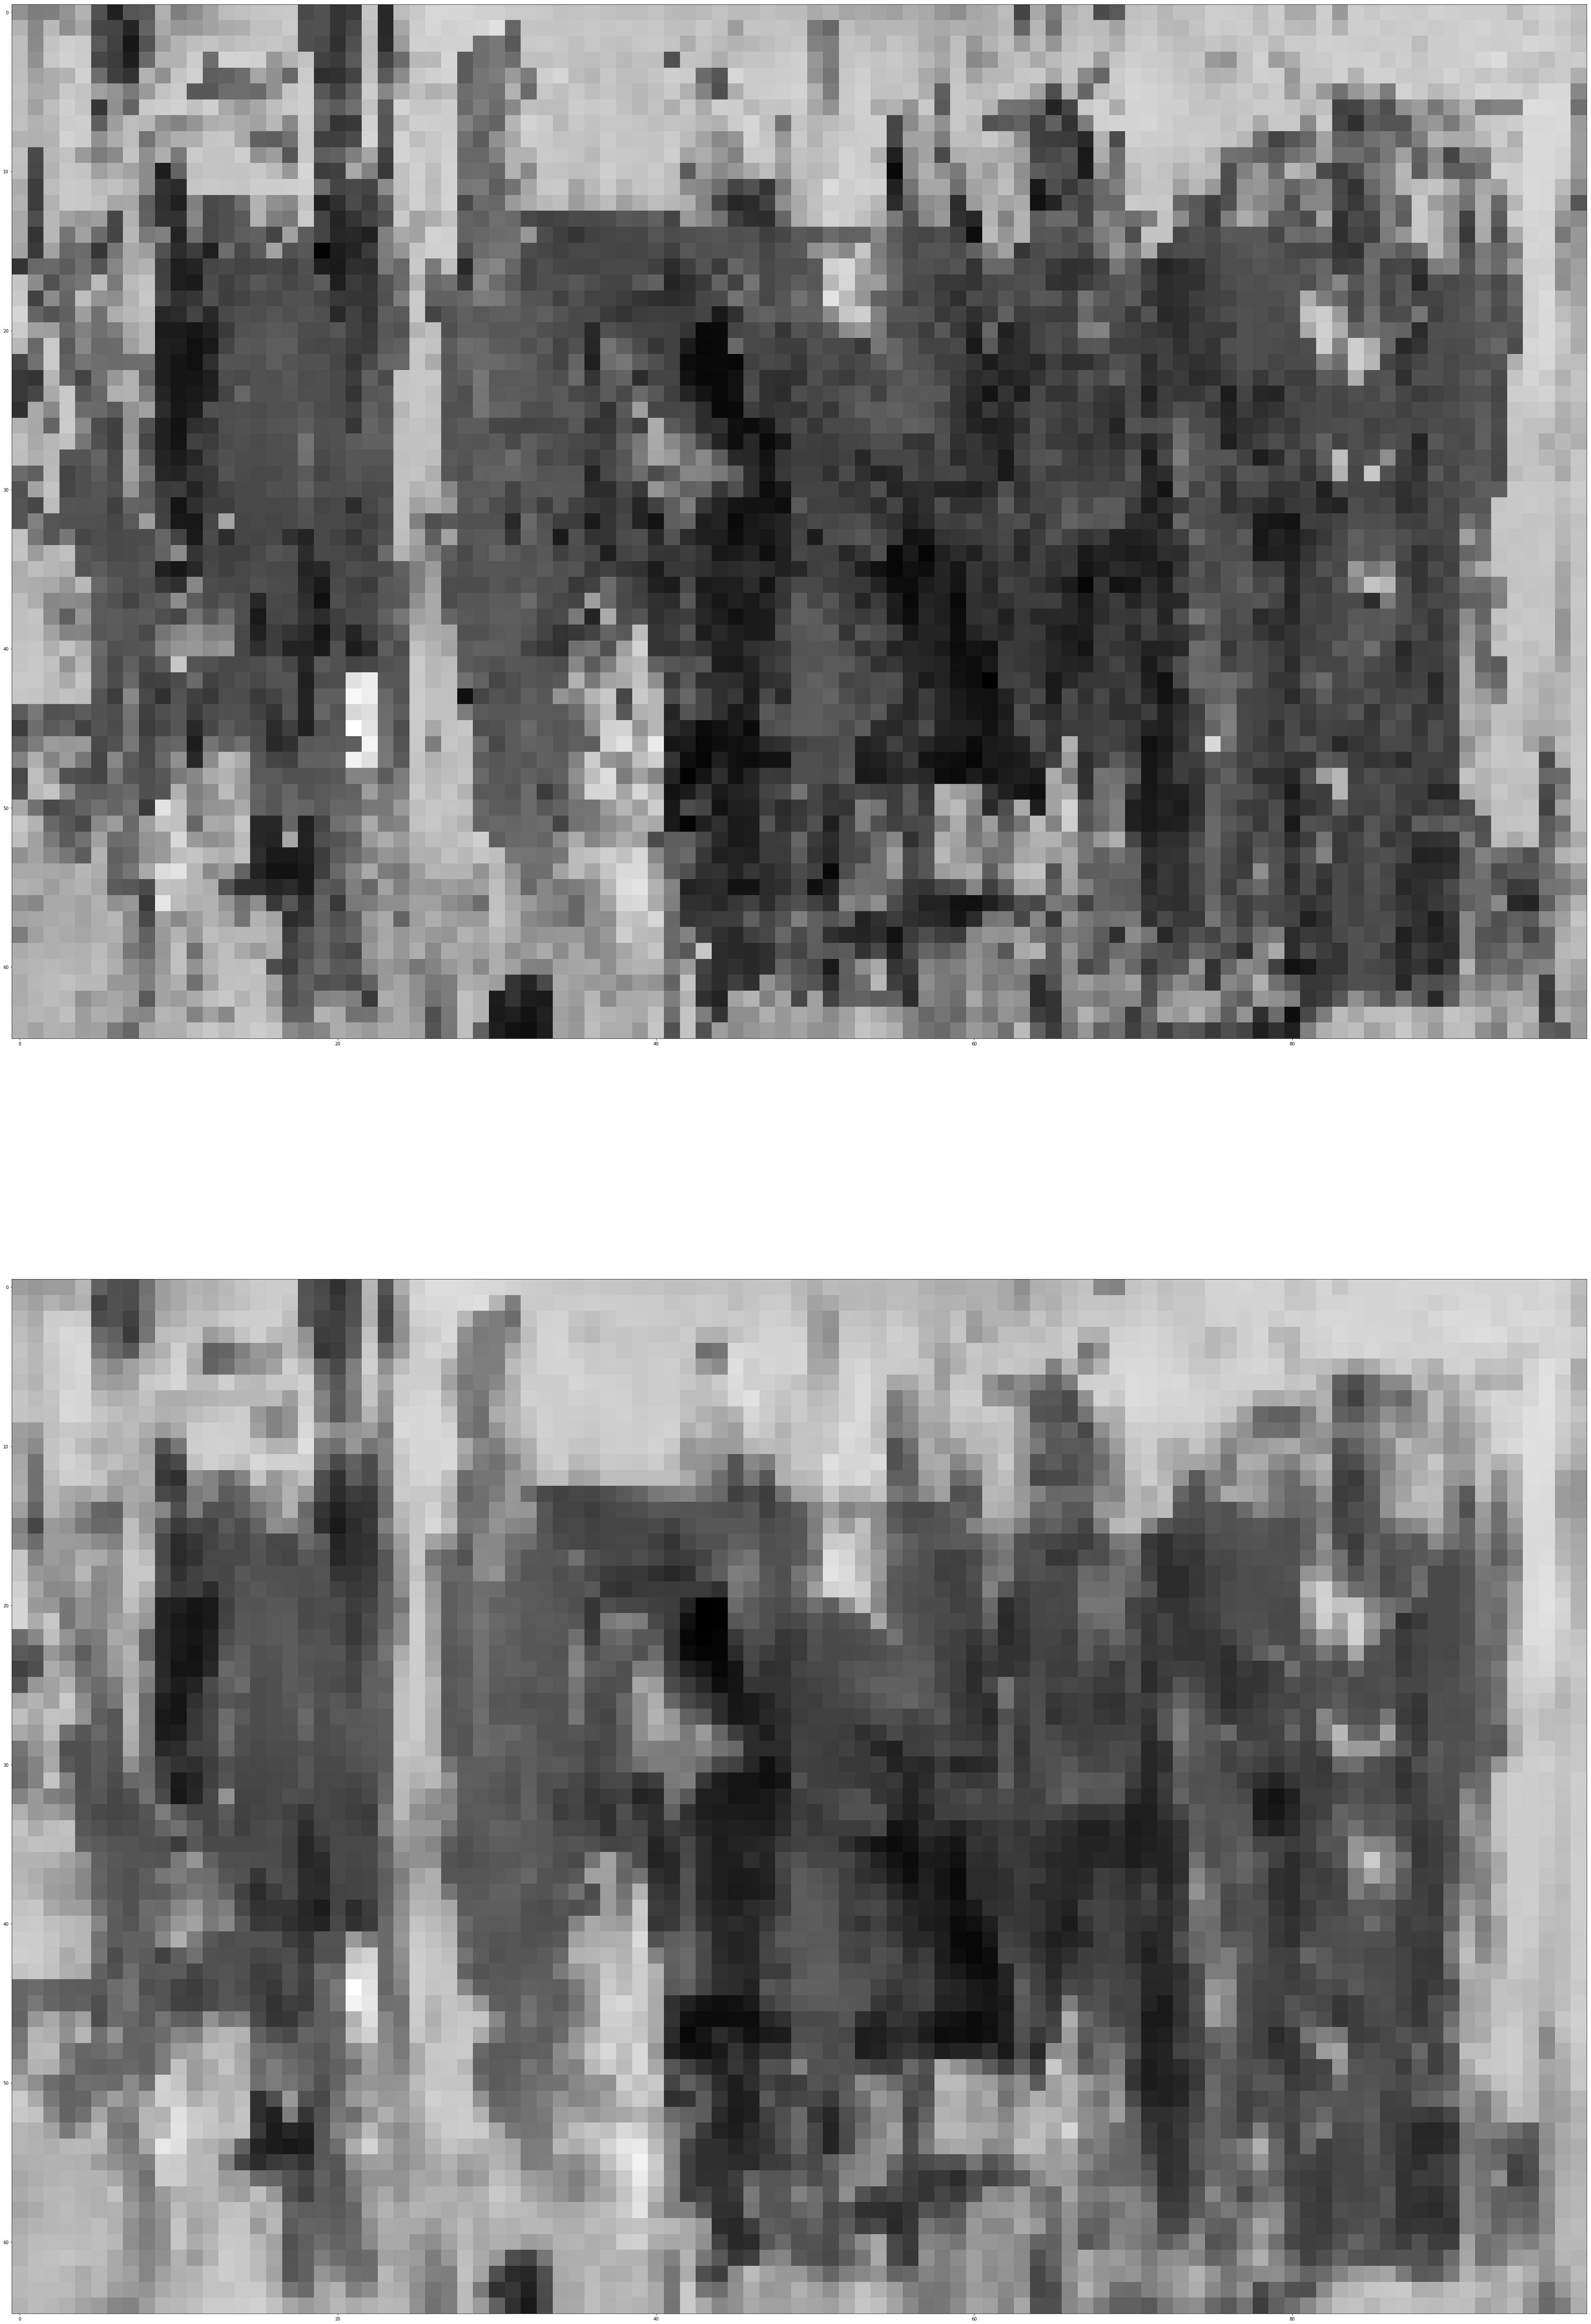

In [13]:
####Testing the conv_layer
img = cv2.imread('image.png')
ker1 = np.zeros((10, 10, 3))
ker12 = np.ones((10, 10, 3))/30000
ker1[5, 5, :] = 1
# print(ker1)
ker2 = []
ker2.append(ker1)
ker2.append(ker12)
img_out1 = conv_layer(img, 2, nonlinear_func, np.array(ker2),  stride = (5, 5), pad = 'valid')
print(img_out1.shape)
img_out1 = pool_layer(img_out1, pool_func, pool_window=(2,2), stride = (2,2))
# img_out1 = pooling(img_out1, pool_func, pool_window=(2,2), stride = (2,2))
# img_out1 = conv2d(img, ker1*1000, nonlinear_func, stride = (5, 5), pad = 'valid')
# plt.imshow(img_out1, cmap = 'gray')
#img_out1 = padding(img, img.shape[1]+10, img.shape[0]+1000)
# print(img_out1.shape[2])

fig = plt.figure(figsize=(img_out1.shape[0], img_out1.shape[1]))  # width, height in inches

for i in range(img_out1.shape[2]):
    sub = fig.add_subplot(img_out1.shape[2], 1, i + 1)
    sub.imshow(img_out1[:,:, i], cmap = 'gray', norm=None)

plt.show()

In [9]:
# ####Testing the pooling_layer
# img = cv2.imread('image.png')
# imgs = []
# imgs.append(img[:, :, 0])
# imgs.append(np.random.randint(25, size = (img.shape[0], img.shape[1])))
# # print(imgs[0].shape)
# # img_out1 = conv2d(img, ker1, nonlinear_func, stride = (5, 5), pad = 'valid')
# img_out1 = pool_layer(np.array(imgs), pool_func, pool_window=(2,2), stride = (2,2))
# #img_out1 = padding(img, img.shape[1]+10, img.shape[0]+1000)
# plt.imshow(img_out1[:, :, 1].astype(int), cmap = 'gray')
# plt.show()

In [14]:
print(img_out1.shape)

(65, 99, 2)
